# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

## Importing the dataset

In [2]:
data = pd.read_csv("Position_Salaries.csv")
inputs = data.iloc[:,1:-1].values
targets = data.iloc[:,-1].values
targets = targets.reshape(len(targets),1)

## Feature Scaling

In [3]:
from sklearn.preprocessing import StandardScaler

# We need two standard scaler objects because the object finds the 
# Std and mean of the tensor it is fit to, so if we fit the standard
# scaler to the inputs we cannot use the same scaler for the targets
# because they have different std and mean
scInputs = StandardScaler()
scTargets = StandardScaler()

inputsScaled = scInputs.fit_transform(inputs)
targetsScaled = scTargets.fit_transform(targets)
targets

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

## Training the SVR model on the whole dataset

In [4]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(inputsScaled,targetsScaled)

/opt/anaconda3/envs/PythonData2020_1/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [5]:
predTargets = regressor.predict(scInputs.transform([[6.5]]))
inputsUnScaled = scInputs.inverse_transform(inputsScaled)
predTargetsUnscaled = scTargets.inverse_transform(predTargets)
print(f'Predicted salary of position 6.5 with \n SVR Regression: ${round(predTargetsUnscaled[0],2)}')


Predicted salary of position 6.5 with 
 SVR Regression: $170370.02


## Visualising the SVR results

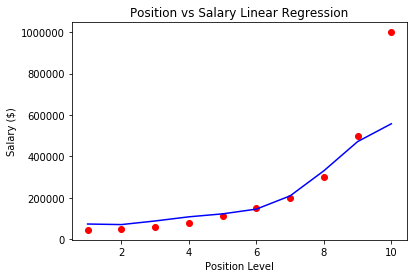

In [6]:
plt.scatter(inputs, targets, color = 'red')
plt.plot(inputs, scTargets.inverse_transform(regressor.predict(inputsScaled)), color='blue')
plt.title("Position vs Salary Linear Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary ($)")
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

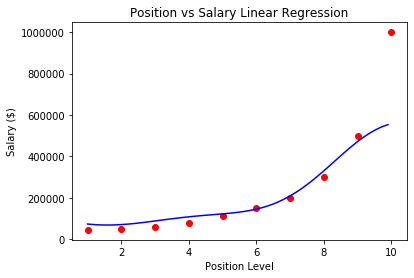

In [7]:
x_grid = np.arange(min(inputs),max(inputs),.1)
x_grid = x_grid.reshape(len(x_grid),1)
plt.scatter(inputs,targets, color = 'red')
plt.plot(x_grid,scTargets.inverse_transform(regressor.predict(scInputs.transform(x_grid))),color='blue')
plt.title("Position vs Salary Linear Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary ($)")
plt.show()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = round(np.sqrt(mean_squared_error(targets, scTargets.inverse_transform(regressor.predict(inputsScaled)))),2)
r2 = round(r2_score(targets, scTargets.inverse_transform(regressor.predict(inputsScaled))),4)
print("The model performance for the SVR")
print("-------------------------------------------")
print(f"RMSE of SVR  is {rmse}")
print(f"R2 score is {r2}")


The model performance for the SVR
-------------------------------------------
RMSE of SVR  is 141550.32
R2 score is 0.7516
